# Detailed analysis of Test Data and its Model Evaluation 

In [15]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

# For inline plotting in notebooks
%matplotlib inline

### Exploratory Data Analysis

#### Define Dataset Path and Basic Information

In [17]:
# Define the path to your dataset (folder structure: dataset -> classes -> images)
data_dir = 'SLangDataset/new_Blmark_data_reduced'

# Get the list of class directories
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Classes found:", classes)

Classes found: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'HI', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#### Analyze Class Distribution
Here, we count the number of images per class and plot the distribution.

Number of images per class:
A: 214
B: 214
C: 214
D: 214
E: 214
F: 214
G: 214
H: 214
HI: 214
I: 214
J: 214
K: 214
L: 214
M: 214
N: 214
O: 214
P: 214
Q: 214
R: 214
S: 214
Space: 214
T: 214
U: 214
V: 214
W: 214
X: 214
Y: 214
Z: 214


C:\Users\User\AppData\Local\Temp\ipykernel_2892\1994707946.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


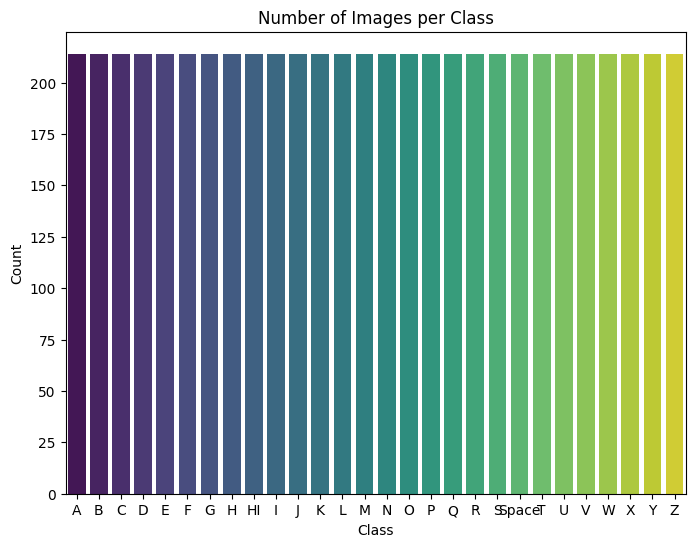

Total number of classes: 28
Total number of images: 5992


In [18]:
# Count images per class
class_counts = {}
for cl in classes:
    cl_path = os.path.join(data_dir, cl)
    # Considering common image formats
    images = [f for f in os.listdir(cl_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    class_counts[cl] = len(images)

# Display the counts
print("Number of images per class:")
for cl, count in class_counts.items():
    print(f"{cl}: {count}")

# Bar plot for class distribution
plt.figure(figsize=(8,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Total images and classes
total_images = sum(class_counts.values())
print(f"Total number of classes: {len(classes)}")
print(f"Total number of images: {total_images}")


####  Visualize Sample Images from Each Class
This cell picks a random image from each class and displays them.

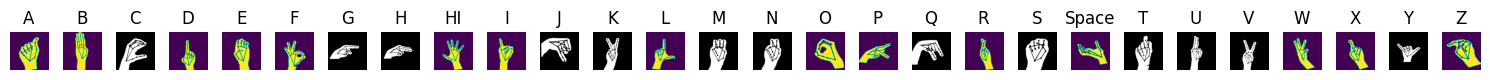

In [19]:
plt.figure(figsize=(15,5))
for i, cl in enumerate(classes):
    cl_path = os.path.join(data_dir, cl)
    images = [f for f in os.listdir(cl_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        sample_img_name = random.choice(images)
        sample_img_path = os.path.join(cl_path, sample_img_name)
        img = Image.open(sample_img_path)
        
        plt.subplot(1, len(classes), i+1)
        plt.imshow(img)
        plt.title(cl)
        plt.axis('off')
plt.tight_layout()
plt.show()


#### Model Evaluation & Prediction
Below is the code to load trained models, perform predictions on the dataset (using an ImageDataGenerator), compute the confusion matrix and classification report, and finally summarize the performance of each model.

In [20]:
# Import additional libraries for modeling and evaluation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define image size and batch size (adjust as needed)
img_height, img_width = 224, 224
batch_size = 32

# Create the test data generator (rescaling pixel values)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Change to 'categorical' if multi-class classification
    shuffle=False
)

# Save mapping from indices to class names
class_names = list(test_generator.class_indices.keys())
print("Classes (from generator):", class_names)


Found 5992 images belonging to 28 classes.
Classes (from generator): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'HI', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#### Define Models Dictionary

In [21]:
models_dict = {
    "MobileNetV2 (T2)": "TrainedBinaryNewModel/MobileNetV2_model.h5",
    "VGG16 (T2)": "TrainedBinaryNewModel/VGG16_model.h5",
    "DenseNet121 (T2)": "TrainedBinaryNewModel/DenseNet121_model.h5",
    "VGG19 (T2)": "TrainedBinaryNewModel/VGG19_model.h5",
    "Fusion Model (T2)": "TrainedBinaryNewModel/FusionModel_model.h5",
    "MobileNet (T2)": "TrainedBinaryNewModel/MobileNet_model.h5",
    "NASNetMobile (T2)": "TrainedBinaryNewModel/NASNetMobile_model.h5"
}


#### Evaluate Each Model
This cell loads each model, performs predictions, calculates evaluation metrics, and plots a confusion matrix.


Evaluating model: MobileNetV2 (T2)
188/188 [==============================] - 31s 163ms/step


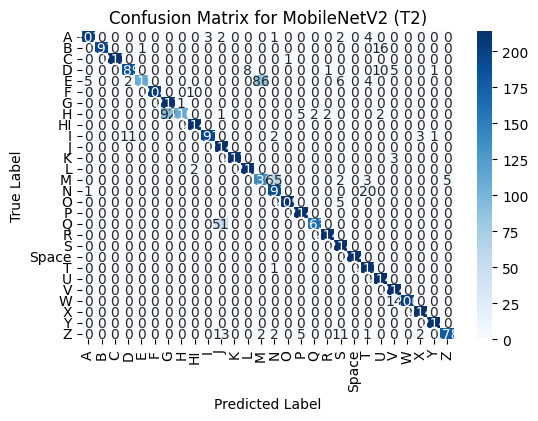

Classification Report for MobileNetV2 (T2):
              precision    recall  f1-score   support

           A       0.97      0.94      0.96       214
           B       1.00      0.92      0.96       214
           C       1.00      1.00      1.00       214
           D       0.94      0.88      0.91       214
           E       0.99      0.52      0.68       214
           F       1.00      0.95      0.98       214
           G       0.70      1.00      0.82       214
           H       0.99      0.51      0.68       214
          HI       0.95      1.00      0.97       214
           I       0.98      0.92      0.95       214
           J       0.76      1.00      0.86       214
           K       1.00      0.99      0.99       214
           L       0.96      0.99      0.98       214
           M       0.61      0.65      0.63       214
           N       0.73      0.90      0.81       214
           O       1.00      0.98      0.99       214
           P       0.96      1.00    

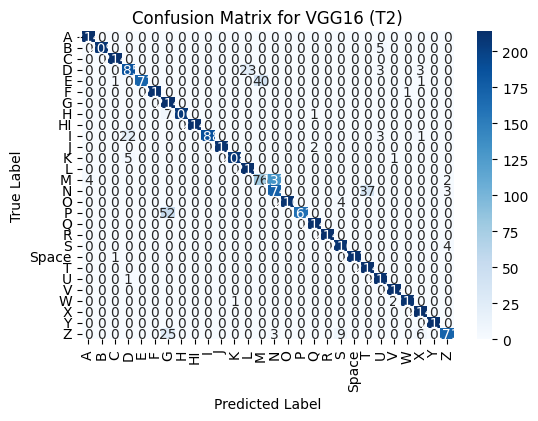

Classification Report for VGG16 (T2):
              precision    recall  f1-score   support

           A       0.98      1.00      0.99       214
           B       1.00      0.98      0.99       214
           C       0.99      1.00      1.00       214
           D       0.87      0.86      0.87       214
           E       1.00      0.80      0.89       214
           F       1.00      1.00      1.00       214
           G       0.72      1.00      0.84       214
           H       1.00      0.96      0.98       214
          HI       1.00      1.00      1.00       214
           I       1.00      0.88      0.94       214
           J       1.00      0.99      1.00       214
           K       1.00      0.97      0.98       214
           L       0.90      1.00      0.95       214
           M       0.66      0.36      0.46       214
           N       0.56      0.81      0.67       214
           O       1.00      0.98      0.99       214
           P       1.00      0.76      0.86

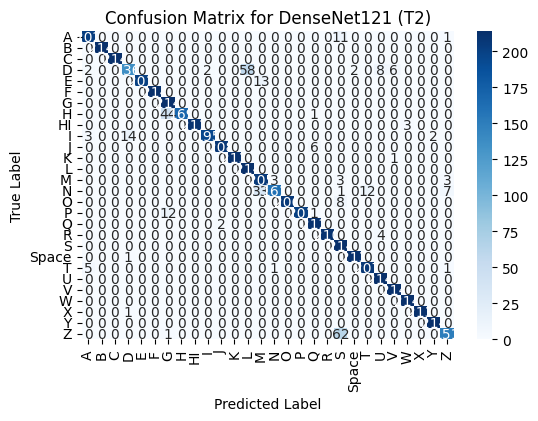

Classification Report for DenseNet121 (T2):
              precision    recall  f1-score   support

           A       0.95      0.94      0.95       214
           B       1.00      1.00      1.00       214
           C       1.00      1.00      1.00       214
           D       0.89      0.64      0.74       214
           E       1.00      0.94      0.97       214
           F       1.00      1.00      1.00       214
           G       0.79      1.00      0.88       214
           H       1.00      0.79      0.88       214
          HI       1.00      0.99      0.99       214
           I       0.99      0.91      0.95       214
           J       0.99      0.97      0.98       214
           K       1.00      1.00      1.00       214
           L       0.79      1.00      0.88       214
           M       0.82      0.96      0.88       214
           N       0.98      0.75      0.85       214
           O       1.00      0.96      0.98       214
           P       1.00      0.94    

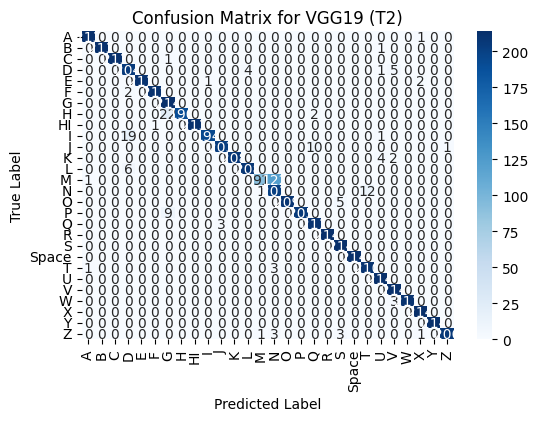

Classification Report for VGG19 (T2):
              precision    recall  f1-score   support

           A       0.99      1.00      0.99       214
           B       1.00      1.00      1.00       214
           C       1.00      1.00      1.00       214
           D       0.88      0.95      0.92       214
           E       1.00      0.99      0.99       214
           F       1.00      0.99      0.99       214
           G       0.87      1.00      0.93       214
           H       1.00      0.89      0.94       214
          HI       1.00      1.00      1.00       214
           I       0.99      0.91      0.95       214
           J       0.99      0.95      0.97       214
           K       1.00      0.97      0.99       214
           L       0.98      0.97      0.98       214
           M       0.98      0.43      0.59       214
           N       0.61      0.94      0.74       214
           O       1.00      0.98      0.99       214
           P       1.00      0.96      0.98

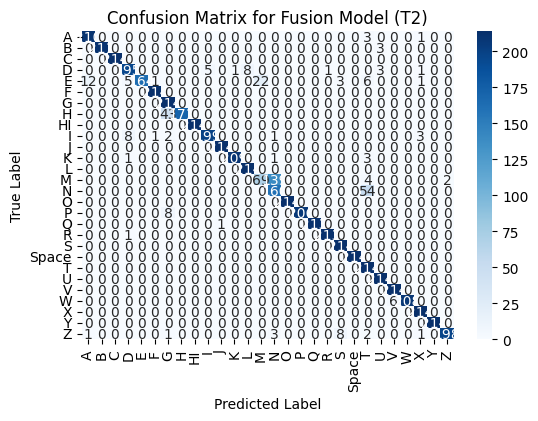

Classification Report for Fusion Model (T2):
              precision    recall  f1-score   support

           A       0.94      0.98      0.96       214
           B       1.00      0.99      0.99       214
           C       1.00      1.00      1.00       214
           D       0.93      0.91      0.92       214
           E       1.00      0.77      0.87       214
           F       0.99      1.00      1.00       214
           G       0.80      1.00      0.89       214
           H       1.00      0.80      0.89       214
          HI       1.00      1.00      1.00       214
           I       0.98      0.93      0.95       214
           J       1.00      1.00      1.00       214
           K       1.00      0.98      0.99       214
           L       0.96      1.00      0.98       214
           M       0.76      0.32      0.45       214
           N       0.53      0.75      0.62       214
           O       1.00      1.00      1.00       214
           P       1.00      0.96   

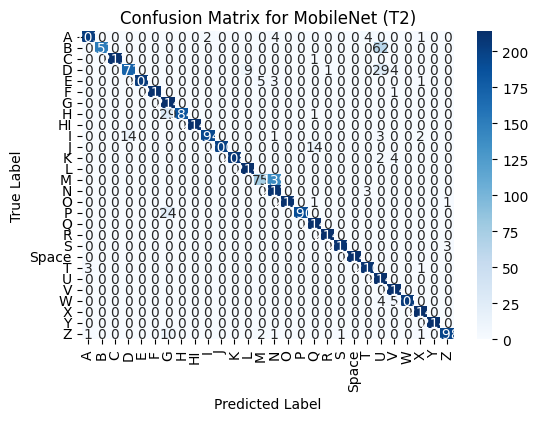

Classification Report for MobileNet (T2):
              precision    recall  f1-score   support

           A       0.98      0.95      0.96       214
           B       1.00      0.71      0.83       214
           C       1.00      1.00      1.00       214
           D       0.92      0.80      0.86       214
           E       1.00      0.96      0.98       214
           F       1.00      1.00      1.00       214
           G       0.77      1.00      0.87       214
           H       1.00      0.86      0.92       214
          HI       1.00      1.00      1.00       214
           I       0.99      0.91      0.95       214
           J       1.00      0.93      0.97       214
           K       1.00      0.97      0.99       214
           L       0.96      1.00      0.98       214
           M       0.91      0.35      0.51       214
           N       0.59      0.99      0.74       214
           O       1.00      0.99      1.00       214
           P       1.00      0.89      

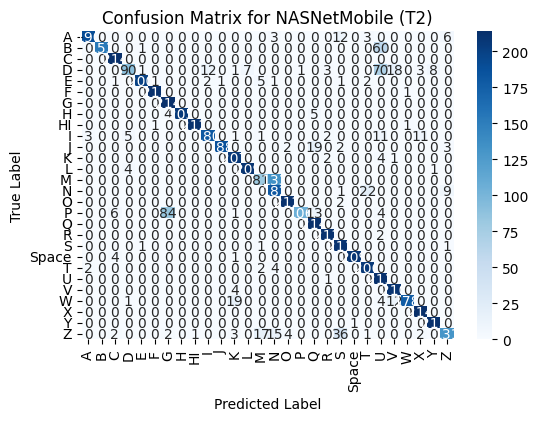

Classification Report for NASNetMobile (T2):
              precision    recall  f1-score   support

           A       0.97      0.89      0.93       214
           B       1.00      0.71      0.83       214
           C       0.94      1.00      0.97       214
           D       0.90      0.42      0.57       214
           E       0.99      0.93      0.96       214
           F       0.99      1.00      0.99       214
           G       0.70      1.00      0.83       214
           H       1.00      0.96      0.98       214
          HI       1.00      0.99      0.99       214
           I       0.93      0.84      0.88       214
           J       0.99      0.88      0.93       214
           K       0.87      0.97      0.92       214
           L       0.97      0.98      0.97       214
           M       0.76      0.38      0.50       214
           N       0.54      0.85      0.66       214
           O       0.97      0.99      0.98       214
           P       0.99      0.50   

In [22]:
# Dictionary to store metrics for each model
results = {}

for model_name, model_path in models_dict.items():
    print(f"\nEvaluating model: {model_name}")
    
    # Load the pre-trained model
    model = load_model(model_path)
    
    # Reset the generator so that predictions start from the beginning
    test_generator.reset()
    
    # Make predictions on the test set
    predictions = model.predict(test_generator, 
                                steps=int(np.ceil(test_generator.samples / batch_size)), 
                                verbose=1)
    
    # Determine predictions based on the output shape
    if predictions.shape[1] == 1:
        # For binary classification (sigmoid output)
        y_pred = (predictions > 0.5).astype("int32").reshape(-1)
    else:
        # For multi-class classification (softmax output)
        y_pred = np.argmax(predictions, axis=1)
    
    # Get true labels from the generator
    y_true = test_generator.classes
    
    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # Compute overall metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Save results
    results[model_name] = {
        "confusion_matrix": cm,
        "classification_report": cr,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))


#### Summary Table Comparing Models
This cell creates a summary table of key metrics for all the evaluated models.

In [24]:
# Create a summary list
summary_data = []
for model_name, metrics in results.items():
    summary_data.append({
        "Model": model_name,
        "Accuracy": metrics["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1-Score": metrics["f1_score"]
    })

# Convert to DataFrame and sort by Accuracy
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="Accuracy", ascending=False)

print("\nSummary of Model Performances:")
display(summary_df)



Summary of Model Performances:


,Model,Accuracy,Precision,Recall,F1-Score
3,VGG19 (T2),0.957610,0.965947,0.957610,0.956117
2,DenseNet121 (T2),0.943591,0.951093,0.943591,0.942933
4,Fusion Model (T2),0.938251,0.945450,0.938251,0.935864
5,MobileNet (T2),0.933745,0.949543,0.933745,0.932115
1,VGG16 (T2),0.932410,0.938908,0.932410,0.930690
0,MobileNetV2 (T2),0.916889,0.928753,0.916889,0.914194
6,NASNetMobile (T2),0.879005,0.900169,0.879005,0.873976


188/188 [==============================] - 8s 35ms/step
Ensemble Pair Accuracies (All Pairs):


,Accuracy
DenseNet121 (T2) + VGG19 (T2),0.969459
DenseNet121 (T2) + MobileNet (T2),0.966789
DenseNet121 (T2) + Fusion Model (T2),0.965287
MobileNetV2 (T2) + DenseNet121 (T2),0.962617
VGG16 (T2) + DenseNet121 (T2),0.962116
VGG19 (T2) + Fusion Model (T2),0.960113
VGG16 (T2) + VGG19 (T2),0.955607
Fusion Model (T2) + MobileNet (T2),0.954940
MobileNetV2 (T2) + VGG19 (T2),0.954606
MobileNetV2 (T2) + VGG16 (T2),0.954439


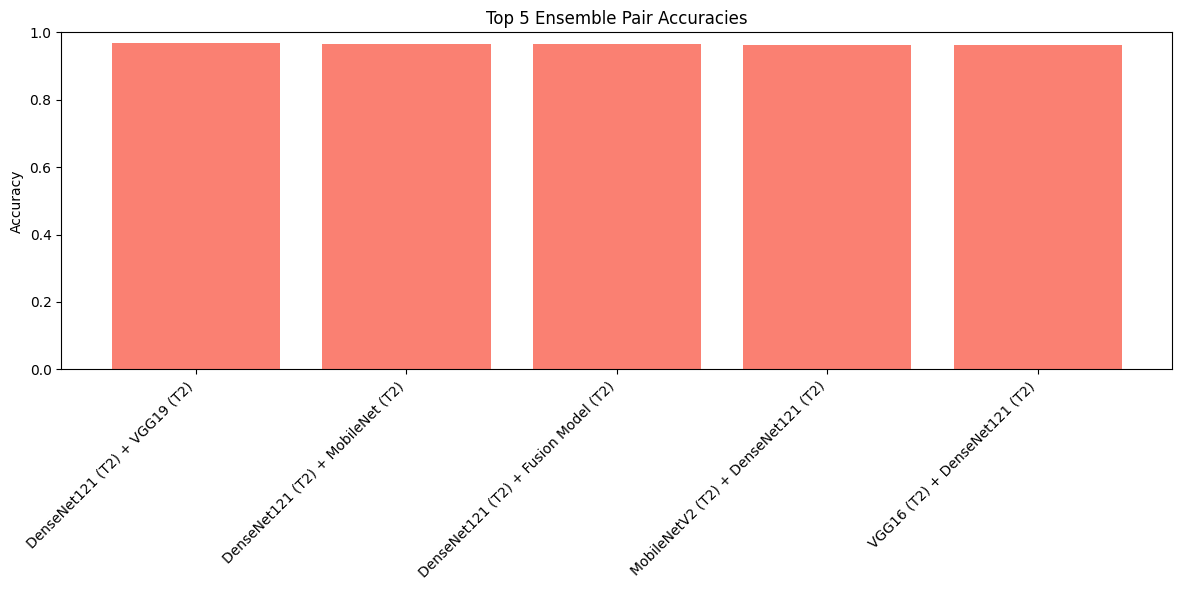

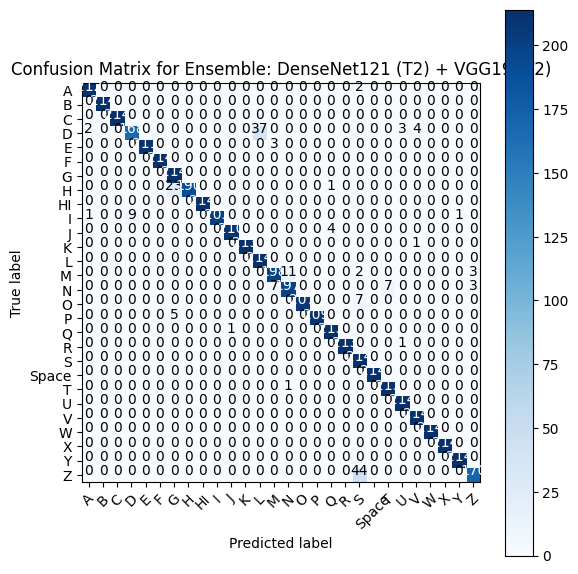

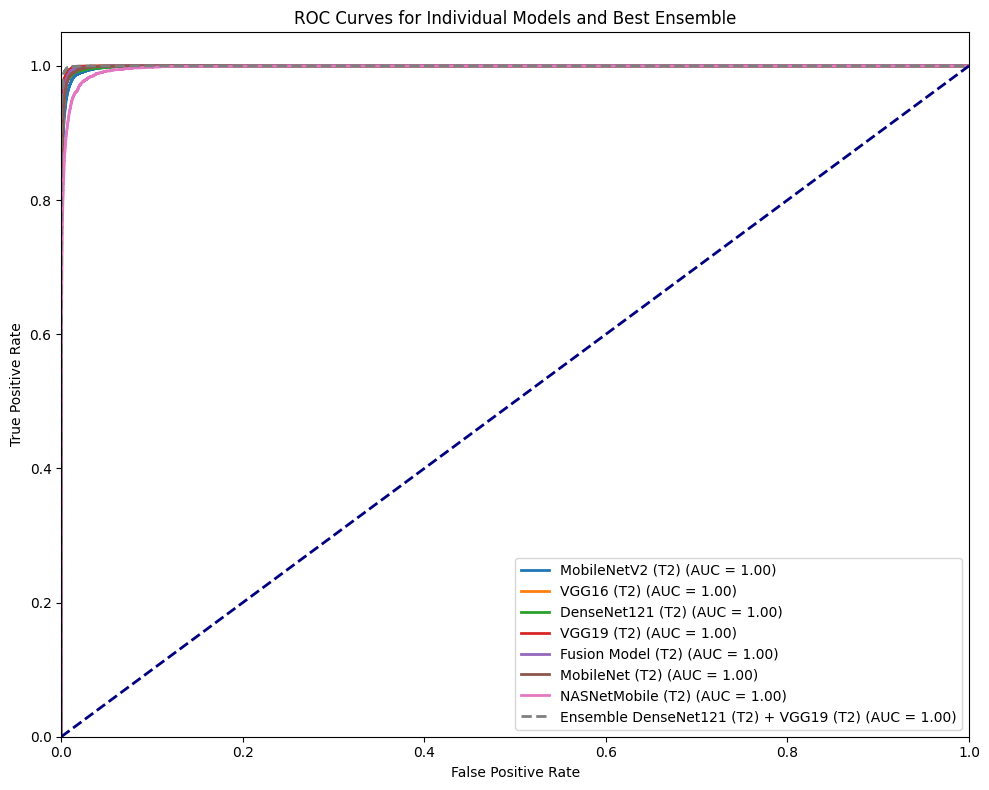

Classification Report for Best Ensemble:
              precision    recall  f1-score   support

           A       0.99      0.99      0.99       214
           B       1.00      1.00      1.00       214
           C       1.00      1.00      1.00       214
           D       0.95      0.79      0.86       214
           E       1.00      0.99      0.99       214
           F       1.00      1.00      1.00       214
           G       0.88      1.00      0.94       214
           H       1.00      0.89      0.94       214
          HI       1.00      1.00      1.00       214
           I       1.00      0.95      0.97       214
           J       1.00      0.98      0.99       214
           K       1.00      1.00      1.00       214
           L       0.85      1.00      0.92       214
           M       0.95      0.93      0.94       214
           N       0.94      0.92      0.93       214
           O       1.00      0.97      0.98       214
           P       1.00      0.98      0

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure 'predictions' is a dictionary mapping model names to prediction arrays.
# If 'models' is not defined, load the models from 'models_dict'.
if 'models' not in globals():
    from tensorflow.keras.models import load_model
    models = {}
    for name, path in models_dict.items():
        models[name] = load_model(path)

# Compute predictions for each model if 'predictions' is not a dict.
if not isinstance(predictions, dict):
    predictions = {name: models[name].predict(test_generator) for name in models}

# Again, ensure class_names and number of classes are set correctly
class_names = sorted(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ") + ["HI", "Space"])
n_classes = len(class_names)

# Dictionaries for ensemble accuracies, predictions and confusion matrices
ensemble_accuracies = {}
ensemble_predictions = {}  # stores ensemble prediction arrays
ensemble_confusion_matrices = {}

# Iterate over each pair of models (ensemble combinations)
for model_pair in combinations(predictions.keys(), 2):
    pair_name = f"{model_pair[0]} + {model_pair[1]}"
    # Average the predictions from the two models
    ens_preds = (predictions[model_pair[0]] + predictions[model_pair[1]]) / 2.0
    ens_classes = np.argmax(ens_preds, axis=1)
    acc = accuracy_score(test_generator.classes, ens_classes)
    ensemble_accuracies[pair_name] = acc
    ensemble_predictions[pair_name] = ens_preds

    # Compute confusion matrix with proper label order
    cm = confusion_matrix(test_generator.classes, ens_classes, labels=range(n_classes))
    ensemble_confusion_matrices[pair_name] = cm

# Create a DataFrame to display ensemble accuracies
ensemble_acc_df = pd.DataFrame.from_dict(ensemble_accuracies, orient='index', columns=['Accuracy'])
ensemble_acc_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print("Ensemble Pair Accuracies (All Pairs):")
display(ensemble_acc_df)

# Plot bar diagram for ensemble accuracies (Top 5 pairs)
top_5 = ensemble_acc_df.head(5)
plt.figure(figsize=(12, 6))
plt.bar(top_5.index, top_5['Accuracy'], color='salmon')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.title('Top 5 Ensemble Pair Accuracies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display confusion matrix for the best ensemble pair
best_ensemble = top_5.index[0]
best_cm = ensemble_confusion_matrices[best_ensemble]
plt.figure(figsize=(6,6))
plt.imshow(best_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Ensemble: {best_ensemble}')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = best_cm.max() / 2.
for i in range(best_cm.shape[0]):
    for j in range(best_cm.shape[1]):
        plt.text(j, i, format(best_cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if best_cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Plot ROC curves for individual models and the best ensemble pair

# Binarize the true labels for multiclass ROC (one-vs-rest)
y_test = label_binarize(test_generator.classes, classes=range(n_classes))

plt.figure(figsize=(10, 8))
# ROC for each individual model (using micro-average ROC)
for name, preds in predictions.items():
    fpr, tpr, _ = roc_curve(y_test.ravel(), preds.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC for the best ensemble
best_ens_preds = ensemble_predictions[best_ensemble]
fpr, tpr, _ = roc_curve(y_test.ravel(), best_ens_preds.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, linestyle='--', label=f'Ensemble {best_ensemble} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Individual Models and Best Ensemble')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Print classification report for the best ensemble
ens_classes_best = np.argmax(best_ens_preds, axis=1)
cr = classification_report(test_generator.classes, ens_classes_best, target_names=class_names)
print("Classification Report for Best Ensemble:")
print(cr)


Classes found: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'HI', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Found 5992 images belonging to 28 classes.
DeiT-Small (T2) model loaded successfully.
188/188 [==============================] - 9s 43ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.70      0.99      0.82       214
           B       1.00      0.14      0.25       214
           C       1.00      1.00      1.00       214
           D       0.99      0.57      0.72       214
           E       0.80      0.88      0.84       214
           F       1.00      1.00      1.00       214
           G       0.98      1.00      0.99       214
           H       0.98      1.00      0.99       214
          HI       1.00      1.00      1.00       214
           I       0.98      0.58      0.73       214
           J       1.00      1.00      1.00       214
           K       0.97  

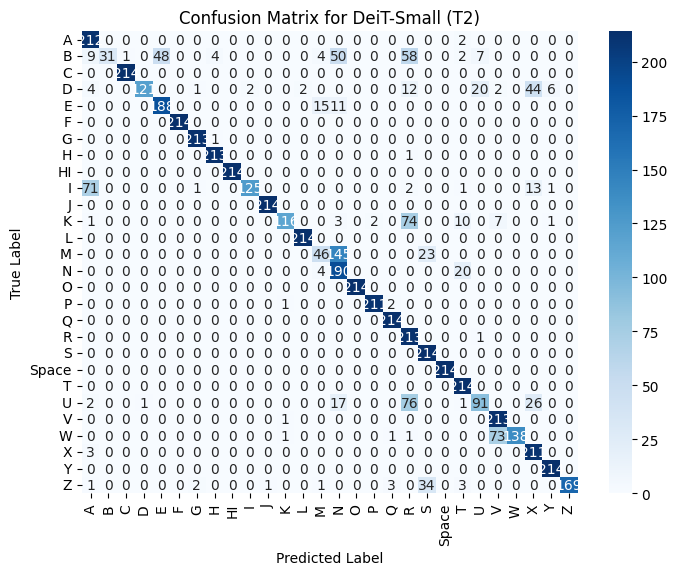

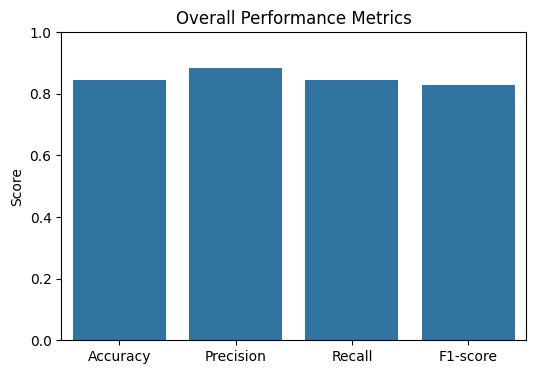

<Figure size 1000x600 with 0 Axes>

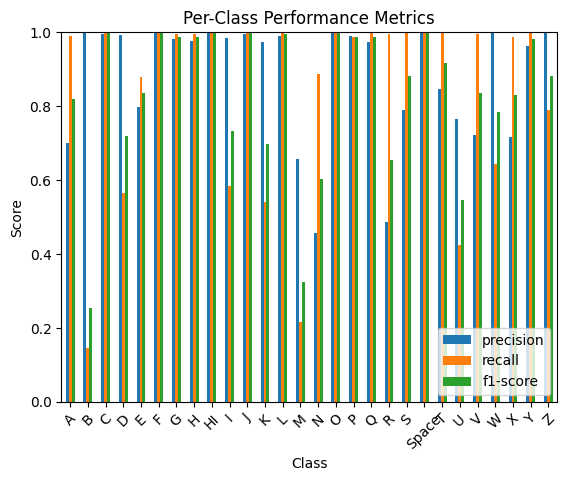

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# -------------------------------
# Define dataset and parameters
# -------------------------------
data_dir = r"SLangDataset/new_Blmark_data_reduced"  # Update to your dataset path

# Get sorted list of class names (assumes folder names are class labels)
class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
print("Classes found:", class_names)

# Define image parameters (adjust target_size if needed)
target_size = (224, 224)  # update as required for your model
batch_size = 32

# -------------------------------
# Create test data generator
# -------------------------------
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # use 'binary' if your problem is binary classification
    shuffle=False
)

# -------------------------------
# Load the DeiT-Small model
# -------------------------------
model_path = "saved_model_full"  # Note: point to the model directory, not a .pb file
model = load_model(model_path)
print("DeiT-Small (T2) model loaded successfully.")

# -------------------------------
# Make predictions on the test set
# -------------------------------
predictions = model.predict(
    test_generator,
    steps=int(np.ceil(test_generator.samples / batch_size)),
    verbose=1
)

# Determine predicted labels
if predictions.shape[1] == 1:
    # Binary classification (sigmoid output)
    y_pred = (predictions > 0.5).astype("int32").reshape(-1)
else:
    # Multi-class classification (softmax output)
    y_pred = np.argmax(predictions, axis=1)

# True labels from the generator
y_true = test_generator.classes

# -------------------------------
# Compute evaluation metrics
# -------------------------------
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
print(f"\nOverall Metrics:\nAccuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1:.4f}")

# -------------------------------
# Plot the Confusion Matrix
# -------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for DeiT-Small (T2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -------------------------------
# Plot Overall Metrics as a Bar Chart
# -------------------------------
metrics = {'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Overall Performance Metrics")
plt.ylabel("Score")
plt.show()

# -------------------------------
# Plot Per-Class Performance Metrics
# -------------------------------
# Exclude 'accuracy', 'macro avg', and 'weighted avg' from the classification report
class_metrics = {cls: scores for cls, scores in cr.items() if cls not in ['accuracy', 'macro avg', 'weighted avg']}
df_metrics = pd.DataFrame(class_metrics).T[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(10, 6))
df_metrics.plot(kind='bar')
plt.ylim(0, 1)
plt.title("Per-Class Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Class")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
